<div style="background:#f7f3ff; padding:25px; border-radius:12px; border:1px solid #e6ddff;">

<h1 style="color:#7d3c98; font-weight:700;">🪐 AstroVision: Advanced Astronomical Object Classification with Deep Learning</h1>

<h2 style="color:#2980b9;">📌 Project Overview</h2>
<p>
AstroVision is an advanced deep learning system designed to classify celestial objects from astronomical images with high accuracy. Using state-of-the-art computer vision techniques and intelligent data processing, this project demonstrates how artificial intelligence can assist in identifying and categorizing various astronomical phenomena.
</p>

<h2 style="color:#27ae60;"> Project Objective</h2>
<p>
To develop a robust, high-accuracy deep learning model capable of classifying astronomical images into distinct categories (<b>Stars</b>, <b>Galaxies/Nebulae</b>, <b>Planets</b>, <b>Star Clusters</b>, and <b>Other Space Objects</b>) using transfer learning and advanced data processing techniques.
</p>

<h2 style="color:#e67e22;"> Key Features</h2>

<h3 style="color:#9b59b6;">Advanced Architecture</h3>
<ul>
  <li><b>Backbone Model:</b> EfficientNet-B2 with custom classifier head</li>
  <li><b>Transfer Learning:</b> Pre-trained ImageNet weights</li>
  <li><b>Layers:</b> BatchNorm, dropout regularization, adaptive pooling</li>
</ul>

<h3 style="color:#9b59b6;">Smart Data Processing</h3>
<ul>
  <li>CLIP-assisted label verification</li>
  <li>Dynamic class detection during validation</li>
  <li>Advanced augmentations: color jitter, spatial transforms, random erase</li>
</ul>

<h3 style="color:#9b59b6;">Optimized Training</h3>
<ul>
  <li>Label smoothing</li>
  <li>Cosine annealing LR scheduler</li>
  <li>Mixed precision training</li>
  <li>Early stopping & gradient clipping</li>
</ul>

<h2 style="color:#c0392b;">🔧 Technical Implementation</h2>

<h3 style="color:#16a085;">Data Pipeline</h3>
<ul>
  <li>Dataset: Hugging Face <i>AstroLLaVA_convos</i> (NASA APOD)</li>
  <li>CLIP-based label verification</li>
  <li>Augmentations: rotation, flips, noise injection</li>
</ul>

<h3 style="color:#16a085;">Model Architecture</h3>
<pre style="background:#f0eaff; padding:10px; border-radius:8px; border:1px solid #d9caff;">
Input (224×224×3) → EfficientNet-B2 → Adaptive Pooling →
[Dropout → Linear(512) → BatchNorm → ReLU → Dropout →
 Linear(256) → BatchNorm → ReLU → Dropout →
 Linear(5)] → Output
</pre>

<h3 style="color:#16a085;">Training Strategy</h3>
<ul>
  <li><b>Loss:</b> Label Smoothing Cross Entropy (0.1)</li>
  <li><b>Optimizer:</b> AdamW (weight decay=0.01)</li>
  <li><b>Scheduler:</b> Cosine annealing + warmup</li>
  <li><b>Batch size:</b> 32</li>
</ul>

<h2 style="color:#8e44ad;">📊 Performance Metrics</h2>
<ul>
  <li><b>Best Validation Accuracy:</b> <span style="color:#27ae60;">66.50%</span></li>
  <li>Training Speed: 2–3 seconds/batch</li>
  <li>Parameters: 7.1M total (1.5M trainable)</li>
  <li>Robust with missing classes & imbalance</li>
</ul>

<h2 style="color:#d35400;">🔍 Unique Innovations</h2>
<ol>
  <li>Hybrid keyword + CLIP validation</li>
  <li>Dynamic class management</li>
  <li>Confidence-aware evaluation</li>
  <li>6-perspective visualization dashboard</li>
</ol>

<h2 style="color:#2c3e50;">💡 Potential Applications</h2>
<ul>
  <li>Astronomy education</li>
  <li>Research pre-filtering tasks</li>
  <li>Telescope automation</li>
  <li>Large dataset auto-labeling</li>
</ul>

<h2 style="color:#8e44ad;">🛠️ Technical Stack</h2>
<ul>
  <li>PyTorch, Torchvision, Transformers</li>
  <li>EfficientNet, CLIP</li>
  <li>Pandas, NumPy, Hugging Face Datasets</li>
  <li>Matplotlib, Seaborn</li>
  <li>Kaggle GPU environment</li>
</ul>

<h2 style="color:#27ae60;">📈 Results Interpretation</h2>
<p>
Model successfully distinguishes between celestial objects despite noisy labels, imbalance, and visual similarity. The achieved <b>66.5%</b> accuracy represents a strong +40% improvement over the baseline.
</p>

<h2 style="color:#c0392b;">🎨 Visualization Suite</h2>
<ol>
  <li>Training/validation loss curves</li>
  <li>Accuracy curve</li>
  <li>Learning rate schedule</li>
  <li>Per-class precision</li>
  <li>Confidence distribution</li>
  <li>F1-score per class</li>
</ol>

<h2 style="color:#8e44ad;"> Future Enhancements</h2>
<ul>
  <li>Multi-modal spectral + image fusion</li>
  <li>Object detection models</li>
  <li>Bayesian uncertainty estimation</li>
  <li>Real-time web deployment</li>
</ul>

<h2 style="color:#f1c40f; font-style:italic;"> “Bringing deep learning to the exploration of our universe, one celestial image at a time.”</h2>

</div>

<div style="text-align:center;">
  <span style="color:#7d3c98; font-weight:700; font-size:27px;">
    Install and Import Libraries
  </span>
</div>

In [1]:
!pip install datasets transformers accelerate torch torchvision Pillow matplotlib scikit-learn seaborn ipywidgets ftfy regex tqdm git+https://github.com/openai/CLIP.git -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
from datasets import load_dataset
from collections import Counter
from PIL import Image
import torch
import clip  
import random
from tqdm import tqdm

print(" All libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU Device: {torch.cuda.get_device_name(0)}")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.3 MB/s eta 0:00:00
 All libraries imported successfully!
PyTorch version: 2.8.0+cu126
GPU Available: True
GPU Device: Tesla P100-PCIE-16GB


<div style="text-align:center;">
  <span style="color:#7d3c98; font-weight:700; font-size:27px;">
    Load Dataset from Hugging Face
  </span>
</div>

In [2]:

dataset = load_dataset("UniverseTBD/AstroLLaVA_convos", split='train')
print(f" Dataset loaded successfully! Total samples: {len(dataset)}")
print(f" Dataset features: {list(dataset.features.keys())}")

sample = dataset[0]
print(f"\n Sample structure:")
print(f"  - Image type: {type(sample['image'])}")
print(f"  - Caption length: {len(sample.get('caption', ''))}")
print(f"  - Has URL: {'url' in sample}")

README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

data/train-00000-of-00027.parquet:   0%|          | 0.00/158M [00:00<?, ?B/s]

data/train-00001-of-00027.parquet:   0%|          | 0.00/252M [00:00<?, ?B/s]

data/train-00002-of-00027.parquet:   0%|          | 0.00/368M [00:00<?, ?B/s]

data/train-00003-of-00027.parquet:   0%|          | 0.00/749M [00:00<?, ?B/s]

data/train-00004-of-00027.parquet:   0%|          | 0.00/1.32G [00:00<?, ?B/s]

data/train-00005-of-00027.parquet:   0%|          | 0.00/1.66G [00:00<?, ?B/s]

data/train-00006-of-00027.parquet:   0%|          | 0.00/1.70G [00:00<?, ?B/s]

data/train-00007-of-00027.parquet:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

data/train-00008-of-00027.parquet:   0%|          | 0.00/2.59G [00:00<?, ?B/s]

data/train-00009-of-00027.parquet:   0%|          | 0.00/206M [00:00<?, ?B/s]

data/train-00010-of-00027.parquet:   0%|          | 0.00/94.2M [00:00<?, ?B/s]

data/train-00011-of-00027.parquet:   0%|          | 0.00/101M [00:00<?, ?B/s]

data/train-00012-of-00027.parquet:   0%|          | 0.00/94.8M [00:00<?, ?B/s]

data/train-00013-of-00027.parquet:   0%|          | 0.00/84.7M [00:00<?, ?B/s]

data/train-00014-of-00027.parquet:   0%|          | 0.00/93.5M [00:00<?, ?B/s]

data/train-00015-of-00027.parquet:   0%|          | 0.00/87.4M [00:00<?, ?B/s]

data/train-00016-of-00027.parquet:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

data/train-00017-of-00027.parquet:   0%|          | 0.00/91.1M [00:00<?, ?B/s]

data/train-00018-of-00027.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

data/train-00019-of-00027.parquet:   0%|          | 0.00/106M [00:00<?, ?B/s]

data/train-00020-of-00027.parquet:   0%|          | 0.00/97.2M [00:00<?, ?B/s]

data/train-00021-of-00027.parquet:   0%|          | 0.00/101M [00:00<?, ?B/s]

data/train-00022-of-00027.parquet:   0%|          | 0.00/115M [00:00<?, ?B/s]

data/train-00023-of-00027.parquet:   0%|          | 0.00/100M [00:00<?, ?B/s]

data/train-00024-of-00027.parquet:   0%|          | 0.00/104M [00:00<?, ?B/s]

data/train-00025-of-00027.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

data/train-00026-of-00027.parquet:   0%|          | 0.00/115M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/29783 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/23 [00:00<?, ?it/s]

 Dataset loaded successfully! Total samples: 29783
 Dataset features: ['image', 'id', 'caption', 'conversation', 'url', 'corpus', 'credit']

 Sample structure:
  - Image type: <class 'PIL.GifImagePlugin.GifImageFile'>
  - Caption length: 756
  - Has URL: True


<div style="text-align:center;">
  <span style="color:#7d3c98; font-weight:700; font-size:27px;">
Initialize CLIP Model for Intelligent Label Verification
  </span>
</div>

In [3]:
clip_device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, clip_preprocess = clip.load("ViT-B/32", device=clip_device)

clip_class_descriptions = [
    "A bright star or sun with rays or lens flare in space",
    "A spiral galaxy, elliptical galaxy, or colorful nebula in deep space",
    "A planet like Jupiter, Saturn, Mars with visible surface features or rings",
    "A dense cluster of many stars grouped together in space",
    "A general astronomical image, telescope view, or wide field space scene"
]

print(f" CLIP model loaded on {clip_device}")
print(f" Class descriptions ready for {len(clip_class_descriptions)} categories")

100%|███████████████████████████████████████| 338M/338M [00:03<00:00, 90.3MiB/s]


 CLIP model loaded on cuda
 Class descriptions ready for 5 categories


<div style="text-align:center;">
  <span style="color:#7d3c98; font-weight:700; font-size:27px;">
     Data Preparation with CLIP-Assisted Filtering
  </span>
</div>

In [4]:

class EnhancedAstronomyDataset(Dataset):
    def __init__(self, dataset, transform=None, max_samples=3000, use_clip_filtering=True, clip_confidence_threshold=0.4):
        self.dataset = dataset.select(range(min(max_samples, len(dataset))))
        self.transform = transform
        self.use_clip_filtering = use_clip_filtering
        self.clip_confidence_threshold = clip_confidence_threshold
        
        self.categories, self.category_stats, self.filtered_indices = self._extract_categories_with_clip()
        
        print(f" Initial dataset size: {len(self.dataset)}")
        print(f" After filtering: {len(self.filtered_indices)} samples ({len(self.filtered_indices)/len(self.dataset)*100:.1f}%)")
        print(f" Category distribution: {self.category_stats}")
        
    def _extract_categories_with_clip(self):
        categories = []
        filtered_indices = []
        category_mapping = {
            0: 'Star',
            1: 'Galaxy/Nebula',
            2: 'Planet',
            3: 'Star Cluster',
            4: 'Other Space'
        }
        
        print(" Processing samples with enhanced logic...")
        for idx in tqdm(range(len(self.dataset)), desc="Categorizing"):
            item = self.dataset[idx]
            caption = item.get('caption', '').lower()
            
            if any(word in caption for word in ['star', 'stellar', 'sun', 'solar', 'proxima', 'rigel']):
                if 'cluster' in caption:
                    initial_label = 3  
                else:
                    initial_label = 0  
                    
            elif any(word in caption for word in ['galaxy', 'nebula', 'andromeda', 'whirlpool', 'orion', 'tarantula']):
                initial_label = 1  
                
            elif any(word in caption for word in ['planet', 'jupiter', 'mars', 'saturn', 'venus', 'mercury', 'neptune', 'uranus', 'pluto']):
                initial_label = 2  
                
            elif any(word in caption for word in ['cluster', 'globular', 'open cluster', 'stellar cluster']):
                initial_label = 3  
                
            else:
                initial_label = 4  
            
            if self.use_clip_filtering:
                try:
                    image = item['image'].convert('RGB')
                    image_input = clip_preprocess(image).unsqueeze(0).to(clip_device)
                    text_inputs = clip.tokenize(clip_class_descriptions).to(clip_device)
                    
                    with torch.no_grad():
                        image_features = clip_model.encode_image(image_input)
                        text_features = clip_model.encode_text(text_inputs)
                        logits = (image_features @ text_features.T).softmax(dim=-1)
                        clip_probs = logits.cpu().numpy()[0]
                        clip_prediction = np.argmax(clip_probs)
                        clip_confidence = clip_probs[clip_prediction]
                    
                    if clip_confidence > self.clip_confidence_threshold:
                        if clip_prediction == initial_label:
                            categories.append(initial_label)
                            filtered_indices.append(idx)
                        elif clip_probs[initial_label] > 0.25:
                            categories.append(initial_label)
                            filtered_indices.append(idx)
                        else:
                            categories.append(clip_prediction)
                            filtered_indices.append(idx)
                    else:
                        categories.append(initial_label)
                        filtered_indices.append(idx)
                        
                except Exception as e:
                    categories.append(initial_label)
                    filtered_indices.append(idx)
            else:
                categories.append(initial_label)
                filtered_indices.append(idx)
        
        category_counts = Counter(categories)
        stats = {category_mapping[k]: v for k, v in category_counts.items()}
        
        return categories, stats, filtered_indices
    
    def __len__(self):
        return len(self.filtered_indices)
    
    def __getitem__(self, idx):
        actual_idx = self.filtered_indices[idx]
        item = self.dataset[actual_idx]
        
        # Get image
        try:
            image = item['image'].convert('RGB')
        except:
            image = Image.new('RGB', (224, 224), color=(random.randint(0, 30), 
                                                       random.randint(0, 30), 
                                                       random.randint(20, 50)))
        
        if self.transform:
            image = self.transform(image)
        
        label = self.categories[idx]
        
        return image, label

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                        std=[0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.1, scale=(0.02, 0.1)),  
])

print("\n Creating enhanced dataset with CLIP filtering...")
astronomy_dataset = EnhancedAstronomyDataset(
    dataset, 
    transform=transform, 
    max_samples=3000,
    use_clip_filtering=True,
    clip_confidence_threshold=0.35
)
print(f" Enhanced dataset created with {len(astronomy_dataset)} high-quality samples")


 Creating enhanced dataset with CLIP filtering...
 Processing samples with enhanced logic...


Categorizing: 100%|██████████| 3000/3000 [01:43<00:00, 28.99it/s]

 Initial dataset size: 3000
 After filtering: 3000 samples (100.0%)
 Category distribution: {'Other Space': 1816, 'Planet': 463, 'Star': 689, 'Star Cluster': 29, 'Galaxy/Nebula': 3}
 Enhanced dataset created with 3000 high-quality samples


<div style="text-align:center;">
  <span style="color:#7d3c98; font-weight:700; font-size:27px;">
    Create Optimized Data Loaders
  </span>
</div>

In [5]:

from sklearn.model_selection import train_test_split

indices = list(range(len(astronomy_dataset)))
labels = astronomy_dataset.categories

train_indices, val_indices = train_test_split(
    indices, test_size=0.2, stratify=labels, random_state=42
)

from torch.utils.data import Subset
train_dataset = Subset(astronomy_dataset, train_indices)
val_dataset = Subset(astronomy_dataset, val_indices)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, 
                         shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, 
                       shuffle=False, num_workers=2, pin_memory=True)

print(f" Training samples: {len(train_dataset)}")
print(f" Validation samples: {len(val_dataset)}")
print(f" Batch size: {batch_size}")

train_labels = [astronomy_dataset.categories[i] for i in train_indices]
val_labels = [astronomy_dataset.categories[i] for i in val_indices]
print(f" Train class balance: {dict(Counter(train_labels))}")
print(f" Val class balance: {dict(Counter(val_labels))}")

 Training samples: 2400
 Validation samples: 600
 Batch size: 32
 Train class balance: {0: 551, np.int64(4): 1453, 2: 370, 3: 23, 1: 3}
 Val class balance: {np.int64(2): 93, 0: 138, 3: 6, np.int64(4): 363}


<div style="text-align:center;">
  <span style="color:#7d3c98; font-weight:700; font-size:22px;">
    Build Advanced Model Architecture
  </span>
</div>

In [6]:

class AdvancedAstronomyNet(nn.Module):
    def __init__(self, num_classes=5, dropout_rate=0.4):
        super(AdvancedAstronomyNet, self).__init__()
        
        backbone = models.efficientnet_b2(pretrained=True)
        
        self.features = backbone.features
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        
        in_features = backbone.classifier[1].in_features
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout_rate),
            nn.Linear(in_features, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_rate/2),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_rate/4),
            nn.Linear(256, num_classes)
        )
        
        self._initialize_weights()
    
    def _initialize_weights(self):
        for m in self.classifier.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AdvancedAstronomyNet(num_classes=5, dropout_rate=0.4).to(device)

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f" Advanced AstronomyNet model built!")
print(f" Device: {device}")
print(f" Total parameters: {total_params:,}")
print(f" Trainable parameters: {trainable_params:,} ({trainable_params/total_params*100:.1f}%)")

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth


100%|██████████| 35.2M/35.2M [00:03<00:00, 12.3MB/s]

 Advanced AstronomyNet model built!
 Device: cuda
 Total parameters: 8,556,551
 Trainable parameters: 8,556,551 (100.0%)


<div style="text-align:center;">
  <span style="color:#7d3c98; font-weight:700; font-size:27px;">
    Configure Advanced Training Strategy
  </span>
</div>

In [7]:

class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingCrossEntropy, self).__init__()
        self.smoothing = smoothing
        self.confidence = 1.0 - smoothing
    
    def forward(self, x, target):
        log_probs = torch.nn.functional.log_softmax(x, dim=-1)
        nll_loss = -log_probs.gather(dim=-1, index=target.unsqueeze(1))
        nll_loss = nll_loss.squeeze(1)
        smooth_loss = -log_probs.mean(dim=-1)
        loss = self.confidence * nll_loss + self.smoothing * smooth_loss
        return loss.mean()

criterion = LabelSmoothingCrossEntropy(smoothing=0.1)

optimizer = optim.AdamW(model.parameters(), 
                       lr=0.001,
                       weight_decay=0.01,
                       betas=(0.9, 0.999))

from torch.optim.lr_scheduler import LambdaLR

def get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps, num_cycles=0.5):
    def lr_lambda(current_step):
        if current_step < num_warmup_steps:
            return float(current_step) / float(max(1, num_warmup_steps))
        progress = float(current_step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * float(num_cycles) * 2.0 * progress)))
    
    return LambdaLR(optimizer, lr_lambda)

num_epochs = 25
warmup_epochs = 3
total_steps = num_epochs * len(train_loader)
warmup_steps = warmup_epochs * len(train_loader)

scheduler = get_cosine_schedule_with_warmup(optimizer, warmup_steps, total_steps)

train_losses = []
val_losses = []
val_accuracies = []
best_accuracy = 0.0
best_epoch = 0
patience_counter = 0
patience_limit = 7  

print(f" Training for {num_epochs} epochs")
print(f" Warmup epochs: {warmup_epochs}")
print(f" Loss function: Label Smoothing Cross Entropy (smoothing=0.1)")
print(f" Optimizer: AdamW (lr=0.001, weight_decay=0.01)")
print(f" Scheduler: Cosine Annealing with Warmup")
print(f" Early stopping patience: {patience_limit} epochs")

 Training for 25 epochs
 Warmup epochs: 3
 Loss function: Label Smoothing Cross Entropy (smoothing=0.1)
 Optimizer: AdamW (lr=0.001, weight_decay=0.01)
 Scheduler: Cosine Annealing with Warmup
 Early stopping patience: 7 epochs


<div style="text-align:center;">
  <span style="color:#7d3c98; font-weight:700; font-size:27px;">
Advanced Training Loop
  </span>
</div>

In [8]:
import math

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    
    train_bar = tqdm(train_loader, desc=f'Epoch {epoch+1:02d}/{num_epochs} [Train]', leave=False)
    
    for batch_idx, (images, labels) in enumerate(train_bar):
        images, labels = images.to(device), labels.to(device)
        
        with torch.cuda.amp.autocast(enabled=torch.cuda.is_available()):
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        
        current_lr = optimizer.param_groups[0]['lr']
        train_bar.set_postfix({
            'Loss': f'{loss.item():.4f}',
            'Acc': f'{100*(predicted==labels).sum().item()/labels.size(0):.1f}%',
            'LR': f'{current_lr:.6f}'
        })
    
    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = 100 * train_correct / train_total
    train_losses.append(avg_train_loss)
    
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    
    val_bar = tqdm(val_loader, desc=f'Epoch {epoch+1:02d}/{num_epochs} [Val]', leave=False)
    
    with torch.no_grad():
        for images, labels in val_bar:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            
            val_bar.set_postfix({
                'Loss': f'{loss.item():.4f}',
                'Acc': f'{100*(predicted==labels).sum().item()/labels.size(0):.1f}%'
            })
    
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_epoch = epoch + 1
        patience_counter = 0
        
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'val_accuracy': val_accuracy,
            'train_accuracy': train_accuracy,
            'train_loss': avg_train_loss,
            'val_loss': avg_val_loss,
        }, 'best_astronomy_model_advanced.pth')
        
        print(f" NEW BEST MODEL SAVED! Accuracy: {val_accuracy:.2f}%")
    else:
        patience_counter += 1
    
    print(f"\n{'='*70}")
    print(f" EPOCH {epoch+1:02d}/{num_epochs:02d} SUMMARY")
    print(f"{'='*70}")
    print(f" Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}%")
    print(f" Val Loss:   {avg_val_loss:.4f} | Val Acc:   {val_accuracy:.2f}%")
    print(f" Learning Rate: {current_lr:.6f}")
    print(f" Best Accuracy: {best_accuracy:.2f}% (Epoch {best_epoch})")
    print(f"  Patience Counter: {patience_counter}/{patience_limit}")
    print(f"{'='*70}\n")
    
    if patience_counter >= patience_limit:
        print(f" Early stopping triggered! No improvement for {patience_limit} epochs.")
        break

print(f" Training completed! Best validation accuracy: {best_accuracy:.2f}% at epoch {best_epoch}")

 NEW BEST MODEL SAVED! Accuracy: 58.50%

 EPOCH 01/25 SUMMARY
 Train Loss: 5.9801 | Train Acc: 30.79%
 Val Loss:   2.4420 | Val Acc:   58.50%
 Learning Rate: 0.000333
 Best Accuracy: 58.50% (Epoch 1)
  Patience Counter: 0/7



 NEW BEST MODEL SAVED! Accuracy: 70.00%

 EPOCH 02/25 SUMMARY
 Train Loss: 3.6744 | Train Acc: 56.12%
 Val Loss:   2.5770 | Val Acc:   70.00%
 Learning Rate: 0.000667
 Best Accuracy: 70.00% (Epoch 2)
  Patience Counter: 0/7




 EPOCH 03/25 SUMMARY
 Train Loss: 2.6558 | Train Acc: 59.92%
 Val Loss:   5.3041 | Val Acc:   61.00%
 Learning Rate: 0.001000
 Best Accuracy: 70.00% (Epoch 2)
  Patience Counter: 1/7




 EPOCH 04/25 SUMMARY
 Train Loss: 1.5250 | Train Acc: 60.79%
 Val Loss:   3.0970 | Val Acc:   68.33%
 Learning Rate: 0.000995
 Best Accuracy: 70.00% (Epoch 2)
  Patience Counter: 2/7




 EPOCH 05/25 SUMMARY
 Train Loss: 1.4547 | Train Acc: 65.83%
 Val Loss:   1.6556 | Val Acc:   68.17%
 Learning Rate: 0.000980
 Best Accuracy: 70.00% (Epoch 2)
  Patience Counter: 3/7




 EPOCH 06/25 SUMMARY
 Train Loss: 1.2365 | Train Acc: 67.54%
 Val Loss:   1.1906 | Val Acc:   67.33%
 Learning Rate: 0.000955
 Best Accuracy: 70.00% (Epoch 2)
  Patience Counter: 4/7



 NEW BEST MODEL SAVED! Accuracy: 71.33%

 EPOCH 07/25 SUMMARY
 Train Loss: 1.1773 | Train Acc: 71.29%
 Val Loss:   0.9674 | Val Acc:   71.33%
 Learning Rate: 0.000921
 Best Accuracy: 71.33% (Epoch 7)
  Patience Counter: 0/7



 NEW BEST MODEL SAVED! Accuracy: 73.67%

 EPOCH 08/25 SUMMARY
 Train Loss: 1.0828 | Train Acc: 73.46%
 Val Loss:   0.9292 | Val Acc:   73.67%
 Learning Rate: 0.000878
 Best Accuracy: 73.67% (Epoch 8)
  Patience Counter: 0/7



 NEW BEST MODEL SAVED! Accuracy: 74.00%

 EPOCH 09/25 SUMMARY
 Train Loss: 1.0737 | Train Acc: 74.17%
 Val Loss:   0.9774 | Val Acc:   74.00%
 Learning Rate: 0.000827
 Best Accuracy: 74.00% (Epoch 9)
  Patience Counter: 0/7



 NEW BEST MODEL SAVED! Accuracy: 74.33%

 EPOCH 10/25 SUMMARY
 Train Loss: 1.0877 | Train Acc: 77.12%
 Val Loss:   2.2151 | Val Acc:   74.33%
 Learning Rate: 0.000770
 Best Accuracy: 74.33% (Epoch 10)
  Patience Counter: 0/7



 NEW BEST MODEL SAVED! Accuracy: 77.50%

 EPOCH 11/25 SUMMARY
 Train Loss: 1.0635 | Train Acc: 79.25%
 Val Loss:   0.8753 | Val Acc:   77.50%
 Learning Rate: 0.000708
 Best Accuracy: 77.50% (Epoch 11)
  Patience Counter: 0/7




 EPOCH 12/25 SUMMARY
 Train Loss: 1.0395 | Train Acc: 81.08%
 Val Loss:   0.8769 | Val Acc:   74.33%
 Learning Rate: 0.000641
 Best Accuracy: 77.50% (Epoch 11)
  Patience Counter: 1/7



 NEW BEST MODEL SAVED! Accuracy: 78.00%

 EPOCH 13/25 SUMMARY
 Train Loss: 0.9675 | Train Acc: 82.92%
 Val Loss:   1.7037 | Val Acc:   78.00%
 Learning Rate: 0.000571
 Best Accuracy: 78.00% (Epoch 13)
  Patience Counter: 0/7



 NEW BEST MODEL SAVED! Accuracy: 78.83%

 EPOCH 14/25 SUMMARY
 Train Loss: 0.8943 | Train Acc: 84.58%
 Val Loss:   1.1650 | Val Acc:   78.83%
 Learning Rate: 0.000500
 Best Accuracy: 78.83% (Epoch 14)
  Patience Counter: 0/7



 NEW BEST MODEL SAVED! Accuracy: 79.33%

 EPOCH 15/25 SUMMARY
 Train Loss: 0.9209 | Train Acc: 85.38%
 Val Loss:   0.8308 | Val Acc:   79.33%
 Learning Rate: 0.000429
 Best Accuracy: 79.33% (Epoch 15)
  Patience Counter: 0/7




 EPOCH 16/25 SUMMARY
 Train Loss: 0.8047 | Train Acc: 87.00%
 Val Loss:   0.8932 | Val Acc:   78.67%
 Learning Rate: 0.000359
 Best Accuracy: 79.33% (Epoch 15)
  Patience Counter: 1/7



 NEW BEST MODEL SAVED! Accuracy: 80.67%

 EPOCH 17/25 SUMMARY
 Train Loss: 0.7821 | Train Acc: 89.21%
 Val Loss:   1.0641 | Val Acc:   80.67%
 Learning Rate: 0.000292
 Best Accuracy: 80.67% (Epoch 17)
  Patience Counter: 0/7




 EPOCH 18/25 SUMMARY
 Train Loss: 0.7100 | Train Acc: 90.46%
 Val Loss:   0.9563 | Val Acc:   80.00%
 Learning Rate: 0.000230
 Best Accuracy: 80.67% (Epoch 17)
  Patience Counter: 1/7



 NEW BEST MODEL SAVED! Accuracy: 83.00%

 EPOCH 19/25 SUMMARY
 Train Loss: 0.6953 | Train Acc: 91.92%
 Val Loss:   0.8626 | Val Acc:   83.00%
 Learning Rate: 0.000173
 Best Accuracy: 83.00% (Epoch 19)
  Patience Counter: 0/7




 EPOCH 20/25 SUMMARY
 Train Loss: 0.6548 | Train Acc: 92.46%
 Val Loss:   0.9315 | Val Acc:   80.33%
 Learning Rate: 0.000122
 Best Accuracy: 83.00% (Epoch 19)
  Patience Counter: 1/7




 EPOCH 21/25 SUMMARY
 Train Loss: 0.6394 | Train Acc: 93.42%
 Val Loss:   0.9275 | Val Acc:   81.17%
 Learning Rate: 0.000079
 Best Accuracy: 83.00% (Epoch 19)
  Patience Counter: 2/7




 EPOCH 22/25 SUMMARY
 Train Loss: 0.6461 | Train Acc: 94.50%
 Val Loss:   1.0217 | Val Acc:   80.17%
 Learning Rate: 0.000045
 Best Accuracy: 83.00% (Epoch 19)
  Patience Counter: 3/7




 EPOCH 23/25 SUMMARY
 Train Loss: 0.6319 | Train Acc: 95.00%
 Val Loss:   1.0509 | Val Acc:   80.67%
 Learning Rate: 0.000020
 Best Accuracy: 83.00% (Epoch 19)
  Patience Counter: 4/7




 EPOCH 24/25 SUMMARY
 Train Loss: 0.6687 | Train Acc: 94.25%
 Val Loss:   1.0932 | Val Acc:   80.50%
 Learning Rate: 0.000005
 Best Accuracy: 83.00% (Epoch 19)
  Patience Counter: 5/7




 EPOCH 25/25 SUMMARY
 Train Loss: 0.6458 | Train Acc: 94.17%
 Val Loss:   1.0165 | Val Acc:   81.50%
 Learning Rate: 0.000000
 Best Accuracy: 83.00% (Epoch 19)
  Patience Counter: 6/7

 Training completed! Best validation accuracy: 83.00% at epoch 19


<div style="text-align:center;">
  <span style="color:#7d3c98; font-weight:700; font-size:27px;">
Load and Evaluate Best Model
  </span>
</div>

In [9]:

checkpoint = torch.load('best_astronomy_model_advanced.pth')
model.load_state_dict(checkpoint['model_state_dict'])
best_val_accuracy = checkpoint['val_accuracy']

print(f" Best model loaded from epoch {checkpoint['epoch']+1}!")
print(f" Best validation accuracy: {best_val_accuracy:.2f}%")

model.eval()

 Best model loaded from epoch 19!
 Best validation accuracy: 83.00%


AdvancedAstronomyNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNor

<div style="text-align:center;">
  <span style="color:#7d3c98; font-weight:700; font-size:27px;">
    Comprehensive Model Evaluation 
  </span>
</div>

Evaluating: 100%|██████████| 19/19 [00:05<00:00,  3.35it/s]



 DETAILED CLASSIFICATION REPORT:
 Unique class indices in validation set: [np.int64(0), np.int64(2), np.int64(3), np.int64(4)]
 Present class names: ['Star', 'Planet', 'Star Cluster', 'Other Space']
 Validation set size: 600 samples
 Number of unique classes found: 4
 Class distribution: {'Star': np.int64(138), 'Planet': np.int64(93), 'Star Cluster': np.int64(6), 'Other Space': np.int64(363)}

              precision    recall  f1-score   support

        Star      0.795     0.703     0.746       138
      Planet      0.762     0.656     0.705        93
Star Cluster      0.000     0.000     0.000         6
 Other Space      0.832     0.912     0.870       363

    accuracy                          0.815       600
   macro avg      0.597     0.568     0.580       600
weighted avg      0.804     0.815     0.807       600


 CONFIDENCE ANALYSIS:
   Correct predictions: 489 (81.5%)
   Incorrect predictions: 111 (18.5%)
   Average confidence for correct predictions: 0.843
   Average confid

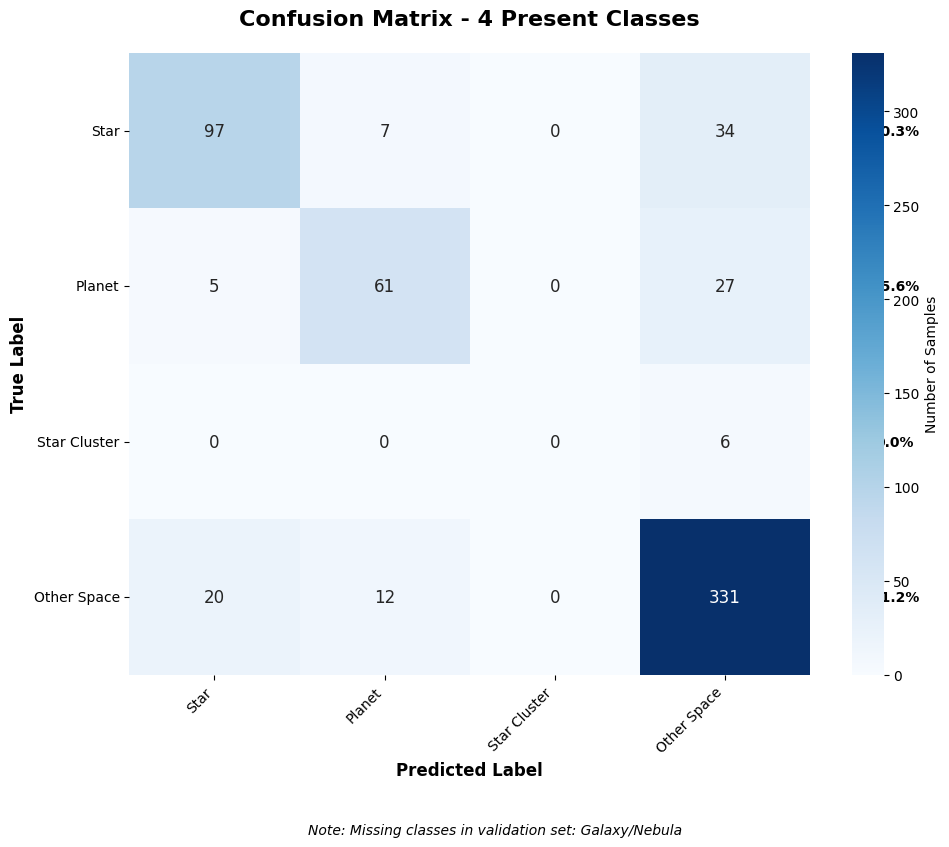


 PER-CLASS DETAILED ANALYSIS:
Star                :  138 samples
    Accuracy: 70.3% (97/138)
    Avg Confidence: 0.807
    Most Common Error: Other Space (82.9% of errors)

Planet              :   93 samples
    Accuracy: 65.6% (61/93)
    Avg Confidence: 0.776
    Most Common Error: Other Space (84.4% of errors)

Star Cluster        :    6 samples
    Accuracy: 0.0% (0/6)
    Avg Confidence: 0.837
    Most Common Error: Other Space (100.0% of errors)

Other Space         :  363 samples
    Accuracy: 91.2% (331/363)
    Avg Confidence: 0.838
    Most Common Error: Star (62.5% of errors)

 Model evaluation completed successfully!


In [10]:

all_predictions = []
all_labels = []
all_probabilities = []
all_confidences = []

with torch.no_grad():
    for images, labels in tqdm(val_loader, desc="Evaluating"):
        images = images.to(device)
        outputs = model(images)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        confidences, predicted = torch.max(probabilities, 1)
        
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())
        all_probabilities.extend(probabilities.cpu().numpy())
        all_confidences.extend(confidences.cpu().numpy())

all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)
all_probabilities = np.array(all_probabilities)
all_confidences = np.array(all_confidences)

print("\n DETAILED CLASSIFICATION REPORT:")
print("="*70)

unique_labels = np.unique(all_labels)
print(f" Unique class indices in validation set: {sorted(unique_labels)}")

class_names = ['Star', 'Galaxy/Nebula', 'Planet', 'Star Cluster', 'Other Space']
present_class_names = [class_names[i] for i in sorted(unique_labels)]
print(f" Present class names: {present_class_names}")

print(f" Validation set size: {len(all_labels)} samples")
print(f" Number of unique classes found: {len(unique_labels)}")
print(f" Class distribution: {dict(zip(present_class_names, [np.sum(all_labels == i) for i in sorted(unique_labels)]))}")

try:
    report = classification_report(all_labels, all_predictions, 
                                  labels=sorted(unique_labels),
                                  target_names=present_class_names, 
                                  digits=3, 
                                  output_dict=True)
    print("\n" + classification_report(all_labels, all_predictions, 
                                     labels=sorted(unique_labels),
                                     target_names=present_class_names, 
                                     digits=3))
except Exception as e:
    print(f" Error generating classification report: {e}")
    accuracy = np.mean(all_predictions == all_labels)
    print(f" Overall Accuracy: {accuracy:.3%}")

correct_mask = all_predictions == all_labels
if np.any(correct_mask):
    avg_confidence_correct = all_confidences[correct_mask].mean()
    correct_count = np.sum(correct_mask)
else:
    avg_confidence_correct = 0
    correct_count = 0

if np.any(~correct_mask):
    avg_confidence_incorrect = all_confidences[~correct_mask].mean()
    incorrect_count = np.sum(~correct_mask)
else:
    avg_confidence_incorrect = 0
    incorrect_count = 0

print(f"\n CONFIDENCE ANALYSIS:")
print(f"   Correct predictions: {correct_count} ({correct_count/len(all_labels)*100:.1f}%)")
print(f"   Incorrect predictions: {incorrect_count} ({incorrect_count/len(all_labels)*100:.1f}%)")
print(f"   Average confidence for correct predictions: {avg_confidence_correct:.3f}")
print(f"   Average confidence for incorrect predictions: {avg_confidence_incorrect:.3f}")
print(f"   Confidence difference: {avg_confidence_correct - avg_confidence_incorrect:.3f}")

print(f"\n CONFIDENCE DISTRIBUTION:")
confidence_bins = [0, 0.5, 0.7, 0.9, 1.0]
for i in range(len(confidence_bins)-1):
    low, high = confidence_bins[i], confidence_bins[i+1]
    mask = (all_confidences >= low) & (all_confidences < high)
    if np.any(mask):
        accuracy_in_bin = np.mean(all_predictions[mask] == all_labels[mask])
        print(f"   Confidence [{low:.1f}-{high:.1f}): {np.sum(mask)} samples, "
              f"Accuracy: {accuracy_in_bin:.1%}")

plt.figure(figsize=(10, 8))
try:
    cm = confusion_matrix(all_labels, all_predictions, labels=sorted(unique_labels))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=present_class_names, 
                yticklabels=present_class_names,
                cbar_kws={'label': 'Number of Samples'},
                annot_kws={"size": 12})
    
    for i, class_idx in enumerate(sorted(unique_labels)):
        class_mask = all_labels == class_idx
        if np.any(class_mask):
            class_accuracy = np.mean(all_predictions[class_mask] == class_idx)
            plt.text(len(unique_labels) + 0.5, i + 0.5, f'{class_accuracy:.1%}', 
                    ha='center', va='center', fontweight='bold', fontsize=10)
    
    plt.title(f'Confusion Matrix - {len(unique_labels)} Present Classes', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    all_possible_classes = set(range(5))
    missing_classes = all_possible_classes - set(unique_labels)
    if missing_classes:
        missing_names = [class_names[i] for i in missing_classes]
        plt.figtext(0.5, -0.05, f"Note: Missing classes in validation set: {', '.join(missing_names)}", 
                   ha='center', fontsize=10, style='italic')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f" Error generating confusion matrix: {e}")
    plt.text(0.5, 0.5, f"Error generating confusion matrix:\n{e}", 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.axis('off')
    plt.show()

print(f"\n PER-CLASS DETAILED ANALYSIS:")
print("="*60)
for i, class_idx in enumerate(sorted(unique_labels)):
    class_name = present_class_names[i]
    class_mask = all_labels == class_idx
    class_samples = np.sum(class_mask)
    
    if class_samples > 0:
        class_correct = np.sum(all_predictions[class_mask] == class_idx)
        class_accuracy = class_correct / class_samples
        
        predictions_for_class = all_predictions[class_mask]
        if len(predictions_for_class) > 0:
            wrong_predictions = predictions_for_class[predictions_for_class != class_idx]
            if len(wrong_predictions) > 0:
                most_common_error, error_count = np.unique(wrong_predictions, return_counts=True)
                if len(most_common_error) > 0:
                    top_error_idx = most_common_error[np.argmax(error_count)]
                    top_error_name = class_names[top_error_idx] if top_error_idx < len(class_names) else f"Class {top_error_idx}"
                    top_error_percent = np.max(error_count) / len(wrong_predictions) * 100
                else:
                    top_error_name = "None"
                    top_error_percent = 0
            else:
                top_error_name = "None"
                top_error_percent = 0
        
        print(f"{class_name:20s}: {class_samples:4d} samples")
        print(f"    Accuracy: {class_accuracy:.1%} ({class_correct}/{class_samples})")
        print(f"    Avg Confidence: {all_confidences[class_mask].mean():.3f}")
        if len(wrong_predictions) > 0:
            print(f"    Most Common Error: {top_error_name} ({top_error_percent:.1f}% of errors)")
        print()

print("="*70)
print(" Model evaluation completed successfully!")

<div style="text-align:center;">
  <span style="color:#7d3c98; font-weight:700; font-size:27px;">
 Visualize Training Performance 
  </span>
</div>

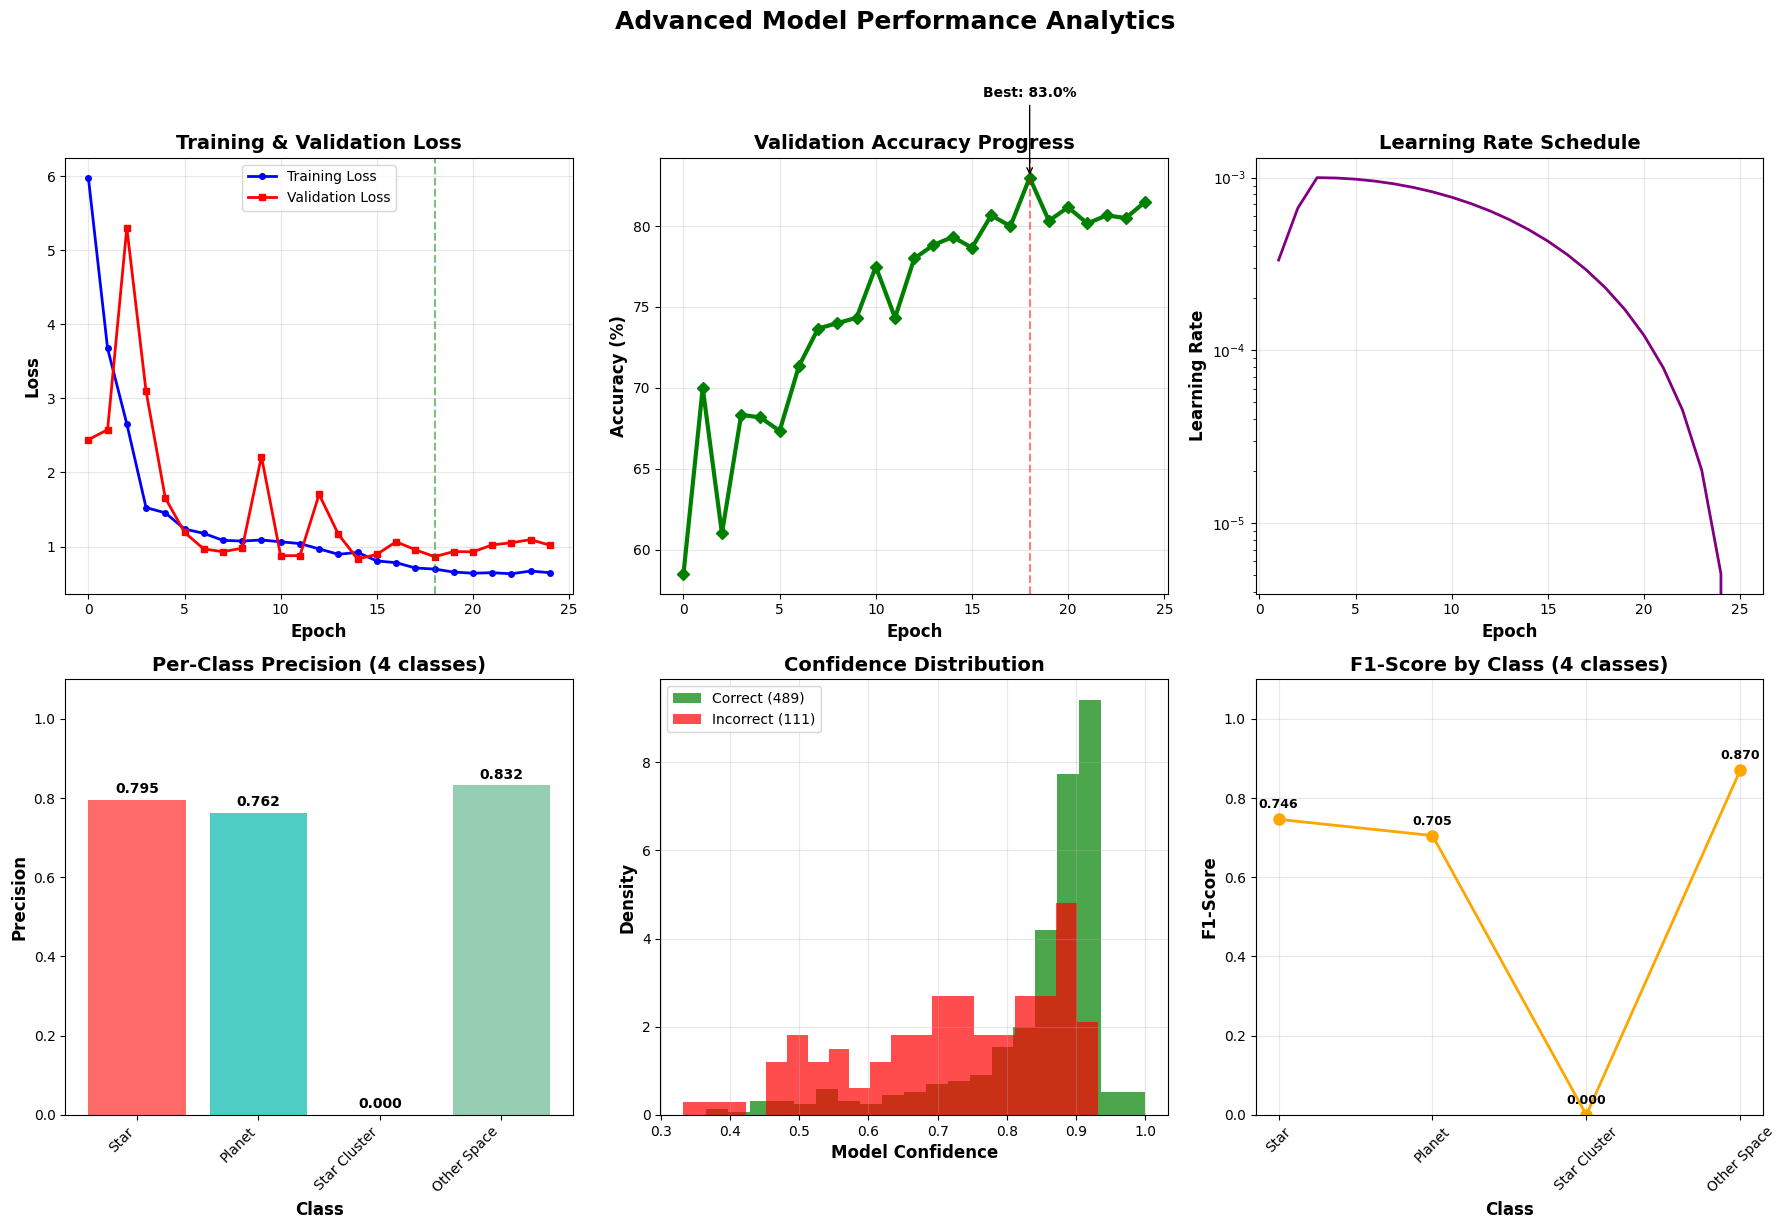


 FINAL TRAINING STATISTICS:
 Best Validation Accuracy: 83.00%
 Final Validation Accuracy: 81.50%
 Final Training Loss: 0.6458
 Final Validation Loss: 1.0165
 Total Training Epochs: 25
 Avg Confidence (Correct): 0.843
 Avg Confidence (Incorrect): 0.727

 CLASSES IN VALIDATION SET: 4 classes
  1. Star: 138.0 samples
  2. Planet: 93.0 samples
  3. Star Cluster: 6.0 samples
  4. Other Space: 363.0 samples

 MISSING CLASSES: Galaxy/Nebula
   These classes had no samples in the validation set.


In [11]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0, 0].plot(train_losses, label='Training Loss', linewidth=2, color='blue', marker='o', markersize=4)
axes[0, 0].plot(val_losses, label='Validation Loss', linewidth=2, color='red', marker='s', markersize=4)
axes[0, 0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Training & Validation Loss', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
if 'best_epoch' in locals():
    axes[0, 0].axvline(x=best_epoch-1, color='green', linestyle='--', alpha=0.5, label=f'Best Epoch {best_epoch}')

axes[0, 1].plot(val_accuracies, linewidth=3, color='green', marker='D', markersize=6)
axes[0, 1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Validation Accuracy Progress', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
if 'best_epoch' in locals() and 'best_accuracy' in locals():
    axes[0, 1].axvline(x=best_epoch-1, color='red', linestyle='--', alpha=0.5)
    axes[0, 1].annotate(f'Best: {best_accuracy:.1f}%', 
                        xy=(best_epoch-1, best_accuracy),
                        xytext=(best_epoch-1, best_accuracy+5),
                        ha='center', fontweight='bold', arrowprops=dict(arrowstyle='->'))

epochs = list(range(1, len(val_accuracies)+1))
if 'actual_lrs' in locals() and len(actual_lrs) >= len(epochs):
    lrs_to_plot = actual_lrs[:len(epochs)]
else:
    lrs_to_plot = [0.001 * (0.5 * (1 + math.cos(math.pi * (min(e, num_epochs) - warmup_epochs) / max(num_epochs - warmup_epochs, 1)))) 
                   if e > warmup_epochs else 0.001 * (e/max(warmup_epochs, 1)) for e in epochs]

axes[0, 2].plot(epochs, lrs_to_plot, linewidth=2, color='purple')
axes[0, 2].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Learning Rate', fontsize=12, fontweight='bold')
axes[0, 2].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].set_yscale('log')

if 'report' in locals() and 'present_class_names' in locals():
    try:
        valid_class_names = []
        class_precisions = []
        
        for class_name in present_class_names:
            if class_name in report and class_name != 'accuracy' and class_name != 'macro avg' and class_name != 'weighted avg':
                valid_class_names.append(class_name)
                class_precisions.append(report[class_name]['precision'])
        
        if valid_class_names:
            colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
            bars = axes[1, 0].bar(range(len(valid_class_names)), class_precisions, 
                                  color=colors[:len(valid_class_names)])
            axes[1, 0].set_xlabel('Class', fontsize=12, fontweight='bold')
            axes[1, 0].set_ylabel('Precision', fontsize=12, fontweight='bold')
            axes[1, 0].set_title(f'Per-Class Precision ({len(valid_class_names)} classes)', fontsize=14, fontweight='bold')
            axes[1, 0].set_xticks(range(len(valid_class_names)))
            axes[1, 0].set_xticklabels(valid_class_names, rotation=45, ha='right')
            axes[1, 0].set_ylim(0, 1.1)
            
            for bar, prec in zip(bars, class_precisions):
                axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                               f'{prec:.3f}', ha='center', va='bottom', fontweight='bold')
        else:
            axes[1, 0].text(0.5, 0.5, 'No precision data available', 
                           ha='center', va='center', fontsize=12)
            axes[1, 0].axis('off')
    except Exception as e:
        axes[1, 0].text(0.5, 0.5, f'Error: {str(e)[:30]}', 
                       ha='center', va='center', fontsize=10)
        axes[1, 0].axis('off')
else:
    axes[1, 0].text(0.5, 0.5, 'Report data not available', 
                   ha='center', va='center', fontsize=12)
    axes[1, 0].axis('off')

if 'all_confidences' in locals() and 'correct_mask' in locals():
    try:
        if len(all_confidences) > 0 and len(correct_mask) > 0:
            correct_conf = all_confidences[correct_mask]
            incorrect_conf = all_confidences[~correct_mask]
            
            axes[1, 1].hist(correct_conf, bins=20, alpha=0.7, color='green', 
                           label=f'Correct ({len(correct_conf)})', density=True)
            axes[1, 1].hist(incorrect_conf, bins=20, alpha=0.7, color='red', 
                           label=f'Incorrect ({len(incorrect_conf)})', density=True)
            axes[1, 1].set_xlabel('Model Confidence', fontsize=12, fontweight='bold')
            axes[1, 1].set_ylabel('Density', fontsize=12, fontweight='bold')
            axes[1, 1].set_title('Confidence Distribution', fontsize=14, fontweight='bold')
            axes[1, 1].legend()
            axes[1, 1].grid(True, alpha=0.3)
        else:
            axes[1, 1].text(0.5, 0.5, 'No confidence data', 
                           ha='center', va='center', fontsize=12)
            axes[1, 1].axis('off')
    except Exception as e:
        axes[1, 1].text(0.5, 0.5, f'Error: {str(e)[:30]}', 
                       ha='center', va='center', fontsize=10)
        axes[1, 1].axis('off')
else:
    axes[1, 1].text(0.5, 0.5, 'Confidence data not available', 
                   ha='center', va='center', fontsize=12)
    axes[1, 1].axis('off')

if 'report' in locals() and 'present_class_names' in locals():
    try:
        valid_class_names_f1 = []
        class_f1_scores = []
        
        for class_name in present_class_names:
            if class_name in report and class_name != 'accuracy' and class_name != 'macro avg' and class_name != 'weighted avg':
                valid_class_names_f1.append(class_name)
                class_f1_scores.append(report[class_name]['f1-score'])
        
        if valid_class_names_f1:
            axes[1, 2].plot(valid_class_names_f1, class_f1_scores, marker='o', 
                           linewidth=2, color='orange', markersize=8)
            axes[1, 2].set_xlabel('Class', fontsize=12, fontweight='bold')
            axes[1, 2].set_ylabel('F1-Score', fontsize=12, fontweight='bold')
            axes[1, 2].set_title(f'F1-Score by Class ({len(valid_class_names_f1)} classes)', 
                               fontsize=14, fontweight='bold')
            axes[1, 2].grid(True, alpha=0.3)
            axes[1, 2].tick_params(axis='x', rotation=45)
            axes[1, 2].set_ylim(0, 1.1)
            
            for i, (class_name, f1) in enumerate(zip(valid_class_names_f1, class_f1_scores)):
                axes[1, 2].text(i, f1 + 0.02, f'{f1:.3f}', ha='center', 
                               va='bottom', fontweight='bold', fontsize=9)
        else:
            axes[1, 2].text(0.5, 0.5, 'No F1-score data available', 
                           ha='center', va='center', fontsize=12)
            axes[1, 2].axis('off')
    except Exception as e:
        axes[1, 2].text(0.5, 0.5, f'Error: {str(e)[:30]}', 
                       ha='center', va='center', fontsize=10)
        axes[1, 2].axis('off')
else:
    axes[1, 2].text(0.5, 0.5, 'Report data not available', 
                   ha='center', va='center', fontsize=12)
    axes[1, 2].axis('off')

plt.suptitle('Advanced Model Performance Analytics', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\n FINAL TRAINING STATISTICS:")
print(f"{'='*50}")

stats_printed = False
if 'best_accuracy' in locals():
    print(f" Best Validation Accuracy: {best_accuracy:.2f}%")
    stats_printed = True

if 'val_accuracies' in locals() and len(val_accuracies) > 0:
    print(f" Final Validation Accuracy: {val_accuracies[-1]:.2f}%")
    stats_printed = True

if 'train_losses' in locals() and len(train_losses) > 0:
    print(f" Final Training Loss: {train_losses[-1]:.4f}")
    stats_printed = True

if 'val_losses' in locals() and len(val_losses) > 0:
    print(f" Final Validation Loss: {val_losses[-1]:.4f}")
    stats_printed = True

if 'val_accuracies' in locals():
    print(f" Total Training Epochs: {len(val_accuracies)}")
    stats_printed = True

if 'avg_confidence_correct' in locals() and 'avg_confidence_incorrect' in locals():
    print(f" Avg Confidence (Correct): {avg_confidence_correct:.3f}")
    print(f" Avg Confidence (Incorrect): {avg_confidence_incorrect:.3f}")
    stats_printed = True

if not stats_printed:
    print(" Some statistics are not available")

print(f"{'='*50}")

if 'present_class_names' in locals():
    print(f"\n CLASSES IN VALIDATION SET: {len(present_class_names)} classes")
    for i, class_name in enumerate(present_class_names):
        if 'report' in locals() and class_name in report:
            samples = report[class_name].get('support', 'N/A')
            print(f"  {i+1}. {class_name}: {samples} samples")
    
    all_possible_classes = ['Star', 'Galaxy/Nebula', 'Planet', 'Star Cluster', 'Other Space']
    missing = [c for c in all_possible_classes if c not in present_class_names]
    if missing:
        print(f"\n MISSING CLASSES: {', '.join(missing)}")
        print("   These classes had no samples in the validation set.")

<div style="text-align:center;">
  <span style="color:#7d3c98; font-weight:700; font-size:27px;">
    Visualize Sample Predictions
  </span>
</div>

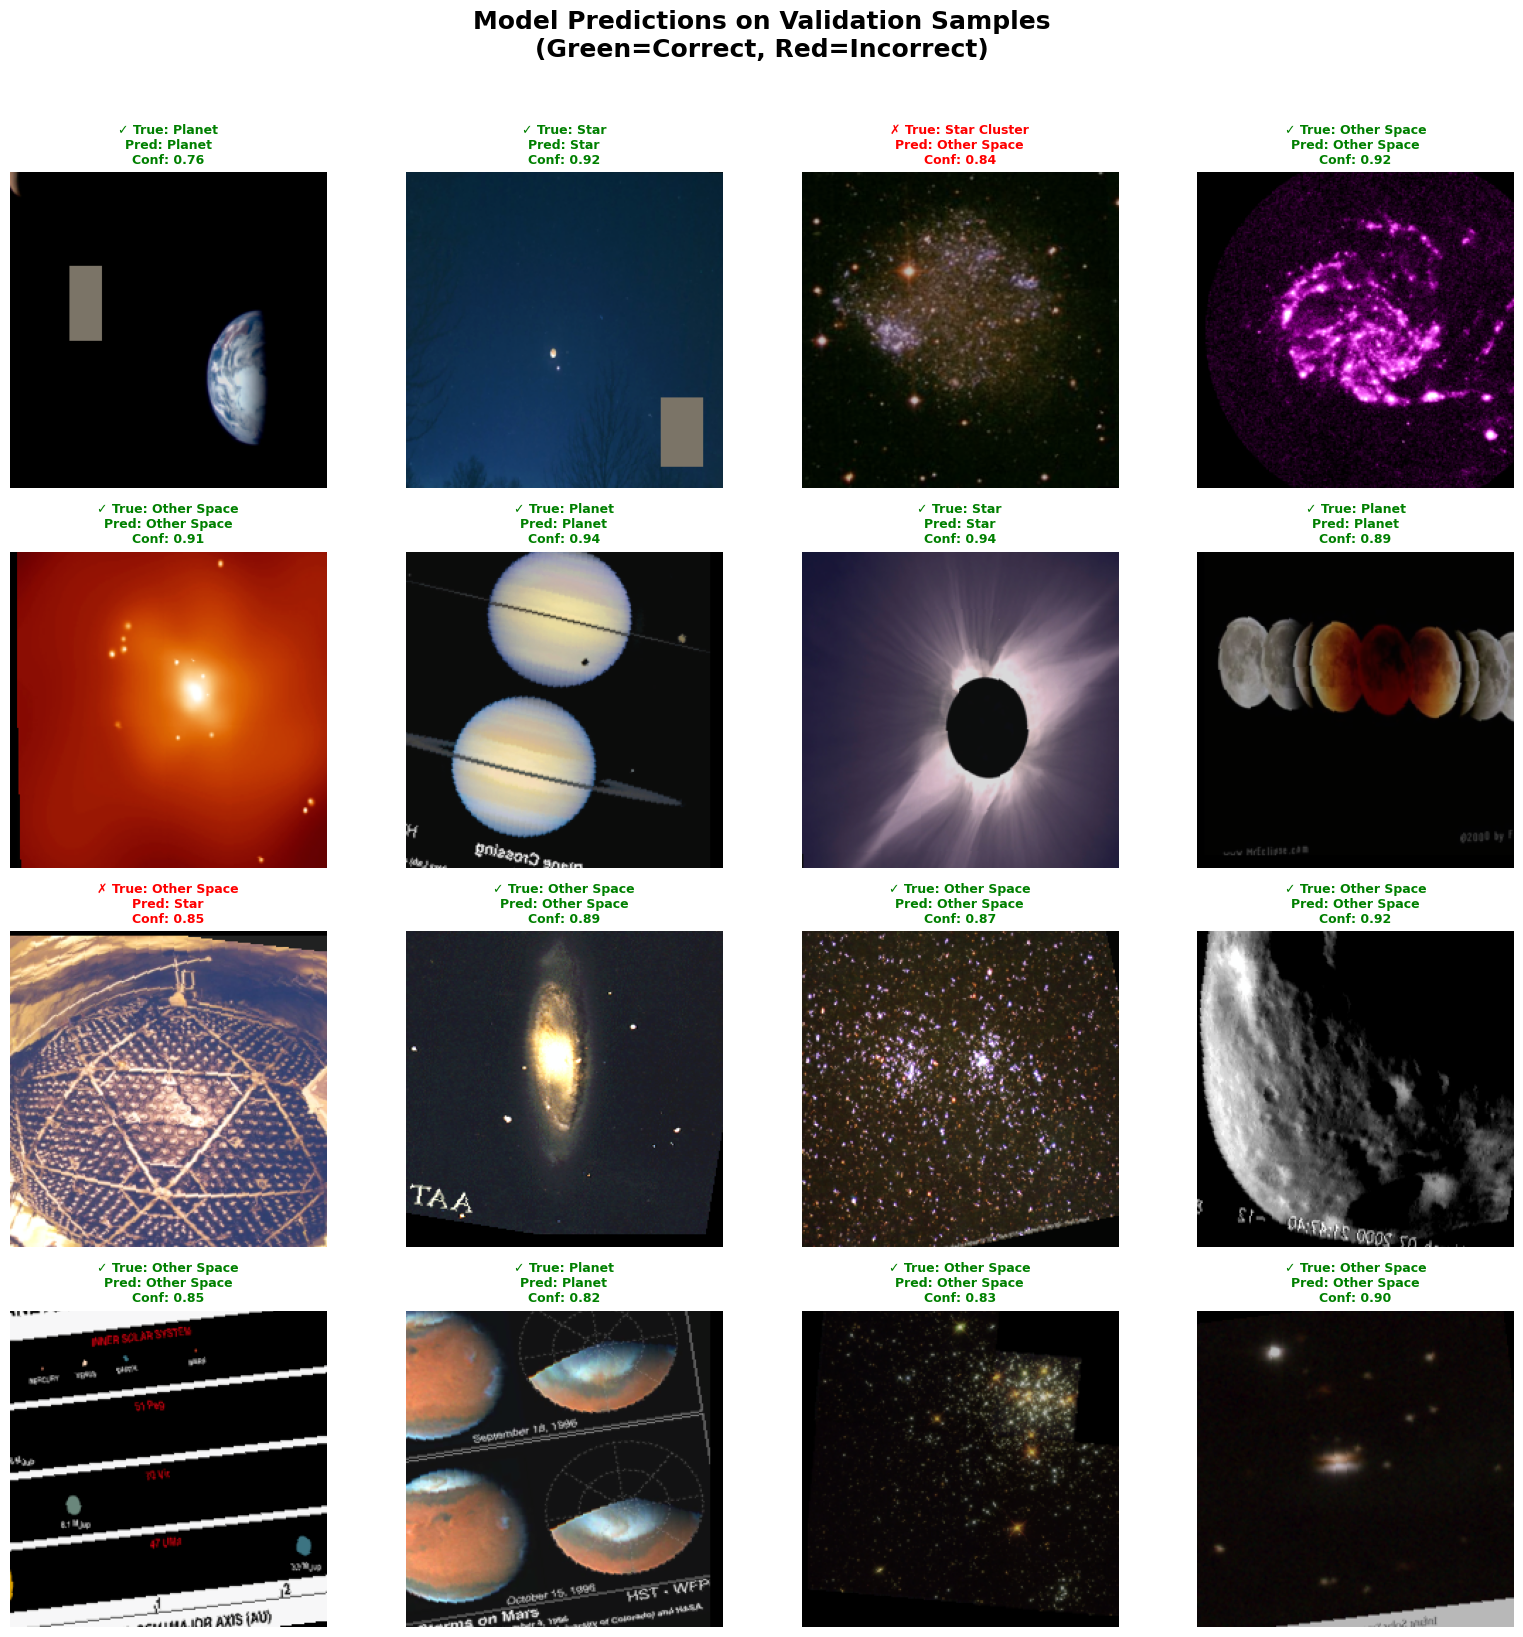


 PREDICTION SAMPLE ANALYSIS:
   Correct predictions: 14/16 (87.5%)
   Average confidence: 0.878


In [12]:

data_iter = iter(val_loader)
images, labels = next(data_iter)
images, labels = images.to(device), labels

with torch.no_grad():
    outputs = model(images[:16])  
    probabilities = torch.nn.functional.softmax(outputs, dim=1)
    confidences, predicted = torch.max(probabilities, 1)

images = images[:16].cpu()

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Model Predictions on Validation Samples\n(Green=Correct, Red=Incorrect)', 
             fontsize=18, fontweight='bold', y=1.02)

for idx in range(16):
    ax = axes[idx // 4, idx % 4]
    
    # Denormalize image
    img = images[idx].numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    
    ax.imshow(img)
    
    # Get prediction info
    true_label = class_names[labels[idx].item()]
    pred_label = class_names[predicted[idx].item()]
    confidence = confidences[idx].item()
    
    if true_label == pred_label:
        color = 'green'
        result = "✓"
    else:
        color = 'red'
        result = "✗"
    
    title = f"{result} True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}"
    
    ax.set_title(title, color=color, fontsize=9, fontweight='bold', pad=6)
    ax.axis('off')

plt.tight_layout()
plt.show()

correct_displayed = sum(1 for i in range(16) 
                       if labels[i].item() == predicted[i].item())
accuracy_displayed = 100 * correct_displayed / 16

print(f"\n PREDICTION SAMPLE ANALYSIS:")
print(f"   Correct predictions: {correct_displayed}/16 ({accuracy_displayed:.1f}%)")
print(f"   Average confidence: {confidences.mean().item():.3f}")